
Fit Exp1D
=========================================
In this example, we simulate a unidimensional (ground truth) MHP with an exponential kernel.

We then estimate the parameters of this MHP using ASLSD, and compare with the simulation ground-truth.


In [1]:
#Basic imports
import os
import sys

# add the path of packages to system path
nb_dir = os.path.split(os.path.split(os.getcwd())[0])[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Aslsd specific imports
from aslsd.basis_kernels.basis_kernel_exponential import ExponentialKernel
from aslsd.kernels.kernel import KernelModel
from aslsd.models.mhp import MHP

#Specify a seed value (for the sake of reproducibility of randomized results)
seed=12

**Simulation**

We first specify our ground-truth model, and its parameter values.

In [3]:
# Define a ground truth MHP
true_kernel = KernelModel([ExponentialKernel()])
true_mhp = MHP([[true_kernel]])

# Define true parameter values
true_mu = np.array([1.5])
true_omega = 0.3
true_beta =  0.8
true_ker_param = [[np.array([true_omega, true_beta])]]

Next, we simulate a single path of this process, over a reasonably long horizon.

In [4]:
T_f = 10**6
list_times = true_mhp.simulate(T_f, mu=true_mu, kernel_param=true_ker_param,
                               seed=seed, verbose=True)

Simulating events...
Simulation Complete,  2143712  events simulated.


This gives us a list of lists (only the first list is interesting, as we have a univariate process), we print the first few observations to give a flavour for what it looks like, and plot the cumulative number of events over an initial period.

Initial event times:[0.6063448  0.74860949 0.80426483 1.07528283 1.9659632  2.19202628
 2.56950209 2.75275838 2.87066406 3.42898429 3.7061142  4.37766385
 4.74634091 5.0895738  5.35689844 5.45785786 5.48997876 5.74799587
 6.02524601 6.13012849]


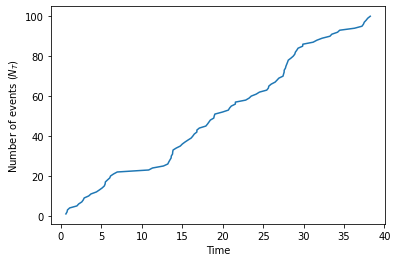

In [5]:
print('Initial event times:'+ str(list_times[0][:20]))
plt.plot(list_times[0][:100], np.arange(1,101))
_=plt.xlabel('Time')
_=plt.ylabel('Number of events ($N_T$)')

**Estimation**

Next, we suppose only the event times data were given, and so define a new model (of the same type as the ground-truth), and estimate its parameters using the ASLSD algorithm. Here we use a constant learning rate in the ADAM optimizer.

In [6]:
# Define an exponential model
kernel = KernelModel(ExponentialKernel())
mhp = MHP([[kernel]])
kwargs = {'is_log_param': True, 'is_log_grad': True}

In [7]:
#Fit the parameters of the model
mhp.fit(list_times, T_f, n_iter=1000, seed=seed, verbose=True, **kwargs)
fit_log = mhp.fit_log

100%|██████████| 1000/1000 [03:53<00:00,  4.28it/s]


We plot the fitted (and ground-truth) kernel, and some goodness of fit plots.

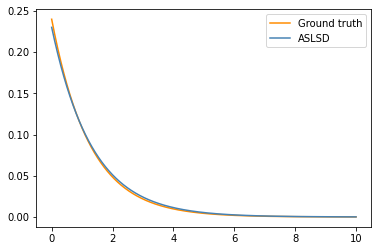

In [8]:
# Visualize results
fig = plt.figure()
t = np.linspace(0, 10, 1000)
true_y = true_mhp.phi[0][0](t, true_ker_param[0][0])
plt.plot(t, true_y, color='darkorange', label='Ground truth')
y = mhp.phi[0][0](t, mhp.fitted_ker_param[0][0])
plt.plot(t, y, color='steelblue', label='ASLSD')
_=plt.legend()

Finally, we can plot the path of the parameters taken by the solver.

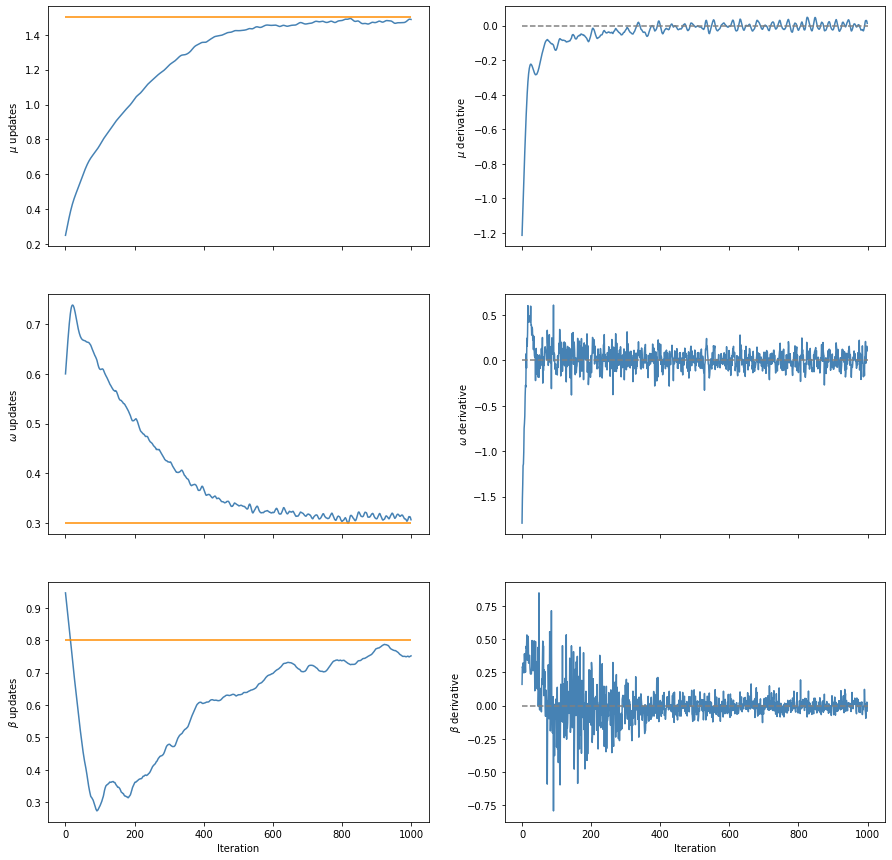

In [9]:
_=mhp.plot_solver_path(true_mu=true_mu, true_ker_param=true_ker_param,
                     plot_derivatives=True, derivatives_zero=True, figsize=(15,15), dpi=None, pad=None)